# EXERCISE 3 - Deep Learning Class 2020.1
**Professor** : Tiago Ugolino Maritan

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jpvt/Deep_Learning/blob/main/Assignment_1/Exercise_3/Exercise_3.ipynb)

## Importing libraries

In [1]:
from data_generator import generate_losangles, generate_edges
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from tail_scratch_nn import DNN
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

## Generating data

In [2]:
quadrants = [0,1,2,3]
data_train = []
data_test = []
amount_train = 500 # Amount of data per class
amount_test = 100

In [3]:
for quadrant in quadrants:
    data_train.extend(generate_losangles(amount_train,quadrant))
    data_test.extend(generate_losangles(amount_test,quadrant))
    data_train.extend(generate_edges(amount_train,quadrant))
    data_test.extend(generate_edges(amount_test,quadrant))
    

In [4]:
data_train = np.array(data_train)
data_test = np.array(data_test)

In [5]:
X_train = data_train[:,[0,1]]
y_train = data_train[:,2]
x_test = data_test[:,[0,1]]
y_test = data_test[:,2]

## Visualizing data

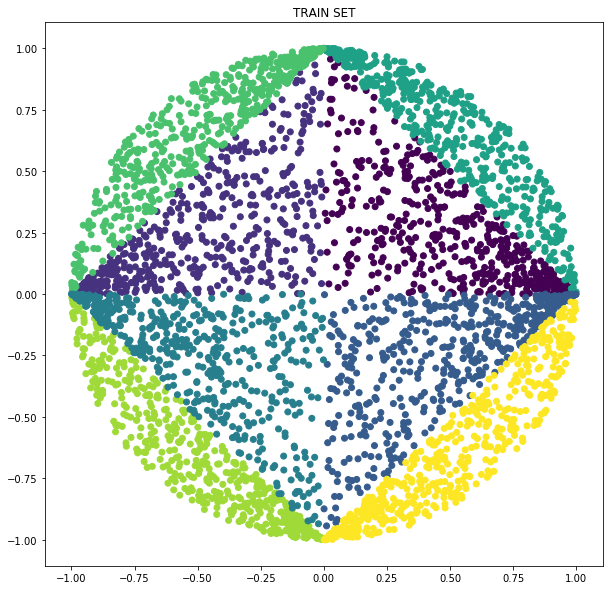

In [6]:
plt.figure(figsize=(10,10))
plt.title('TRAIN SET')
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)
plt.show()

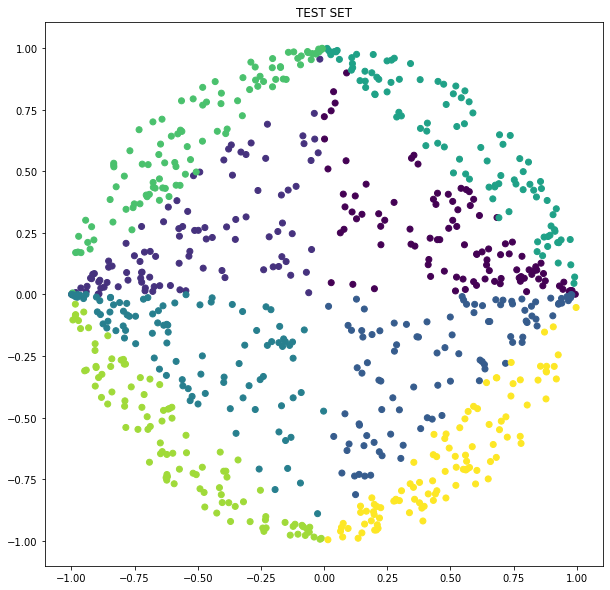

In [7]:
plt.figure(figsize=(10,10))
plt.title('TEST SET')
plt.scatter(x_test[:,0], x_test[:,1], c = y_test)
plt.show()

* OneHotEncoding our answers, so the softmax function can learn and predict with them.

In [8]:
onehot = OneHotEncoder()

In [9]:
onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = onehot.fit_transform(y_test.reshape(-1,1)).toarray()

***

In [10]:
neural_net = DNN()

In [11]:
neural_net.fit(X_train.T, y_train.T, x_test.T, y_test.T, hidden="relu", output="softmax")

EPOCH 0 Train cost : 2.07944129 | val cost : 2.0794413
EPOCH 10 Train cost : 2.07397496 | val cost : 2.0740614
EPOCH 20 Train cost : 2.01354854 | val cost : 2.01407927
EPOCH 30 Train cost : 1.82593148 | val cost : 1.82618678
EPOCH 40 Train cost : 1.50069365 | val cost : 1.50002132
EPOCH 50 Train cost : 1.17280097 | val cost : 1.18352647
EPOCH 60 Train cost : 0.939887 | val cost : 0.95271824
EPOCH 70 Train cost : 0.78395733 | val cost : 0.78954075
EPOCH 80 Train cost : 0.63493677 | val cost : 0.63634944
EPOCH 90 Train cost : 0.50842239 | val cost : 0.50484685
EPOCH 100 Train cost : 0.41096118 | val cost : 0.40343462
EPOCH 110 Train cost : 0.34072255 | val cost : 0.33157815
EPOCH 120 Train cost : 0.2904846 | val cost : 0.28075333
EPOCH 130 Train cost : 0.25677634 | val cost : 0.24549742
EPOCH 140 Train cost : 0.23479441 | val cost : 0.22278127
EPOCH 150 Train cost : 0.22160857 | val cost : 0.21344661
EPOCH 160 Train cost : 0.20897048 | val cost : 0.19572193
EPOCH 170 Train cost : 0.19917

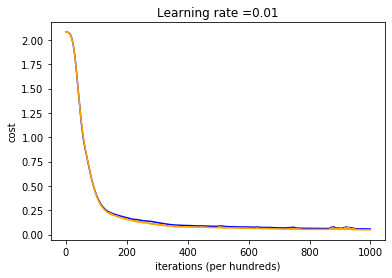

In [12]:
neural_net.train([2, 10, 10, 8], learning_rate=0.01, iterations=1000, adam_optimizer=True)

In [13]:
y_pred = neural_net.predict(x_test.T).T

In [14]:
np.argmax(y_pred, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5,

In [15]:
np.argmax(y_test, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5,

In [16]:
accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

0.98625

In [17]:
cf_matrix = confusion_matrix(np.argmax(y_test, axis =1), np.argmax(y_pred,axis =1))

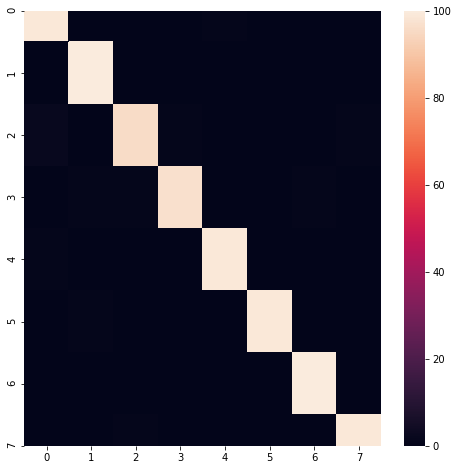

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(cf_matrix)

In [19]:
cf_matrix

array([[ 99,   0,   0,   0,   1,   0,   0,   0],
       [  0, 100,   0,   0,   0,   0,   0,   0],
       [  2,   0,  96,   1,   0,   0,   0,   1],
       [  0,   1,   1,  97,   0,   0,   1,   0],
       [  1,   0,   0,   0,  99,   0,   0,   0],
       [  0,   1,   0,   0,   0,  99,   0,   0],
       [  0,   0,   0,   0,   0,   0, 100,   0],
       [  0,   0,   1,   0,   0,   0,   0,  99]])